In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
df = pd.read_csv('Data for Cleaning & Modeling.csv')
df.head()

C:\Users\yomaa\AppData\Local\Temp\ipykernel_11132\2927276076.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data for Cleaning & Modeling.csv')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

In [47]:
df.isna().sum()

X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23986
X11     17538
X12     61361
X13     61028
X14         1
X15         1
X16    276440
X17         1
X18        19
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         0
dtype: int64

# EDA

1. Let us format some of the columns.

In [32]:
df["X1"] = df["X1"].replace('[\$,]', '', regex=True).replace('[\%,]', '', regex=True).astype(float)
df["X30"] = df["X30"].replace('[\$,]', '', regex=True).replace('[\%,]', '', regex=True).astype(float)

In [33]:
df["X4"] = df["X4"].replace('[\$,]', '', regex=True).astype(float)
df["X5"] = df["X4"].replace('[\$,]', '', regex=True).astype(float)
df["X6"] = df["X4"].replace('[\$,]', '', regex=True).astype(float)

In [38]:
df["X32"] = np.where(df["X32"] == "w",1,0)

In [44]:
df["X8"].value_counts()

B    101668
C     90071
D     55621
A     53707
E     25518
F      9784
G      2361
Name: X8, dtype: int64

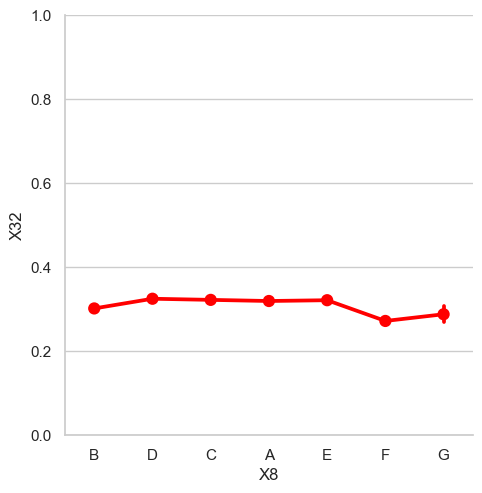

In [42]:
h = sns.PairGrid(data=df, x_vars=['X8'], y_vars='X32', height=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))